## Mean Pikachu and Pichu

In [198]:
import numpy as np
def mean_files(_width, _height):
    mean_width = np.mean(_width)
    mean_height = np.mean(_height)
    return mean_width, mean_height

## Knn Method

In [199]:
def euclidean(a, b):
    distances = np.sqrt(np.sum((a - b) ** 2, axis=1))
    return distances

def knn(labels, pika_pich, entity_dimensions):
    distances = euclidean(pika_pich, entity_dimensions)
    nn_id = np.argsort(distances)[:5]
    nn_labels = labels[nn_id]
    return nn_labels


## Classes for UnknownEntity, Pikachu and pichu

In [200]:
from numbers import Number
"""Förklaring på metoder"""
class Pikachu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pikachu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):            #Kommentarer
            raise(f"Height and width must be a number, not '{type(height, width)}'")
            
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width

class Pichu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
class Entity:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
    
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width

## Cleaning data method

In [201]:
import re
import numpy as np

def clean_data(stats_path, from_file):
    if from_file:
        with open(stats_path, "r") as file:
            raw_stats = file.read()
    else:
        raw_stats = stats_path
    
    nospace_dimentions = re.sub(r"[ ]{1,}", "", raw_stats)
    dimentions = re.sub(r"[\n]", ",", nospace_dimentions)
    
    dimentions = dimentions.split("),(")
    dimentions =  [x.strip("()") for x in dimentions]
    
    pattern = re.compile(r"^\d+(\.\d+)?,\d+(\.\d+)?$")
    clean_dimensions = [x for x in dimentions if pattern.match(x)]
    
    cordinates = [eval(cordinate) for cordinate in clean_dimensions]
    _width, _height = zip(*cordinates)
    
    return _width, _height

## Fetching data/files

In [202]:
from_file = True
stats_path_pikachu = "../data/pikachu.txt" 
pikachu_width, pikachu_height = clean_data(stats_path_pikachu, from_file)

stats_path_pichu = "../data/pichu.txt"
pichu_width, pichu_height = clean_data(stats_path_pichu, from_file)

stats_path = "../Data/test_points.txt"
test_width, test_height = clean_data(stats_path, from_file)

"""print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")
print(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")"""

'print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")\nprint(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")'

## User Interface

In [203]:
def ui_console():
    import numpy as np
    

    entity_width = float(input("Enter width of entity: "))
    entity_height = float(input("Enter height of entity: "))
    entity_dimensions = (f"({entity_width}, {entity_height})")
    pikachu_label = np.zeros(len(pikachu_height), dtype=int)
    pichu_label = np.ones(len(pichu_height), dtype=int)

    labels = np.concatenate((pikachu_label, pichu_label))

    entity_dimensions = np.concatenate((np.column_stack((entity_width, entity_height))))
    pika_pich = np.concatenate((
        np.column_stack((pikachu_width, pikachu_height)), 
        np.column_stack((pichu_width, pichu_height))
        ))

    nn_labels = knn(labels, pika_pich, entity_dimensions)
    sum_pikachu = np.sum(nn_labels== 0)
    sum_pichu = np.sum(nn_labels== 1)

    if(sum_pikachu > sum_pichu):
        print(f"Looks like your found a Pikachu!")
    else:
        print(f"Looks like your found a Pichu!")
    print(f"pikachu: {sum_pikachu}\nPichu: {sum_pichu}")
    
        
    """entity_width, entity_height = clean_data(entity_dimensions, from_file= False)
    
    
    width_pikachu, height_pikachu = clean_data(stats_path_pikachu, from_file= True)
    width_pichu, height_pichu = clean_data(stats_path_pichu, from_file= True)
    
    width_mean_pikachu, height_mean_pikachu = mean_files(width_pikachu, height_pikachu)
    width_mean_pichu, height_mean_pichu = mean_files(width_pichu, height_pichu)
        
    entity_distance_pikachu = np.sqrt((width_mean_pikachu - entity_width)**2 + (height_mean_pikachu - entity_height)**2) 
    entity_distance_pichu = np.sqrt((width_mean_pichu - entity_width)**2 + (height_mean_pichu - entity_height)**2)

    if entity_distance_pikachu < entity_distance_pichu:
        print(f"You most likly found a Pikachu!")
        
        entity = Entity(entity_width, entity_height)

    elif entity_distance_pichu < entity_distance_pikachu:
        print(f"You most likly found a Pichu!")
        
        entity = Entity(entity_width, entity_height)

    else:
        print(F"I am unshore if you found a Pikachu or Pichu...")
    """
    return entity_width, entity_height

## Plotting 

Looks like your found a Pichu!
pikachu: 2
Pichu: 3


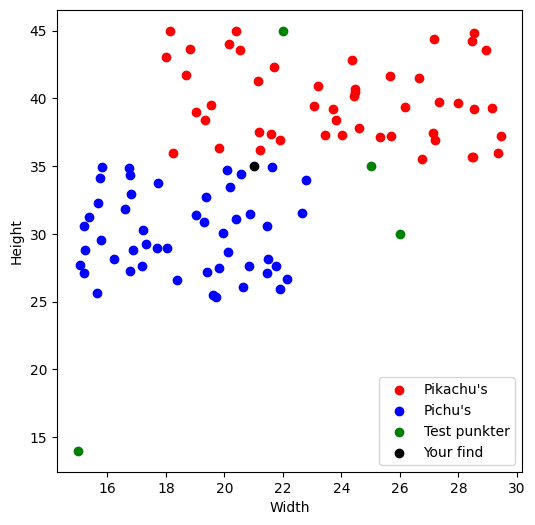

In [204]:
import matplotlib.pyplot as plt


entity_width, entity_height = ui_console()

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "red", label = "Pikachu's")
plt.scatter(pichu_width, pichu_height, color = "blue", label = "Pichu's")
plt.scatter(test_width, test_height, color = "green", label = "Test punkter")
plt.scatter(entity_width, entity_height, color = "black", label = "Your find")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")